# 1. Introducción

El aprendizaje automático ha demostrado ser una herramienta poderosa en el campo de la medicina, permitiendo la detección temprana y el diagnóstico de diversas enfermedades. En este proyecto, nos centraremos en la predicción de la presencia de cálculos renales a través del análisis de orina.

## 1.1. Resumen del problema

Los cálculos renales son una afección común que puede causar dolor severo y complicaciones si no se detectan y tratan a tiempo. La formación de cálculos renales puede estar relacionada con ciertas características físicas de la orina. El objetivo de este proyecto es desarrollar un modelo de aprendizaje automático que pueda predecir la presencia de cálculos renales basándose en estas características.

## 1.2. Conjunto de datos

El conjunto de datos consta de 79 muestras de orina que se analizaron para determinar si ciertas características físicas de la orina podrían estar relacionadas con la formación de cristales de oxalato de calcio, un tipo común de cálculo renal. Los datos se obtuvieron del capítulo "Physical Characteristics of Urines With and Without Crystals" de la Serie Springer en Estadísticas.

## 1.3. Características del conjunto de datos

El conjunto de datos incluye seis características físicas de la orina:

- Gravedad específica (Gravity): Se expresa como una relación entre la densidad de una sustancia (en este caso, la orina) y la densidad de una sustancia de referencia (generalmente agua). Rango: Normalmente, el valor de la gravedad específica de la orina se encuentra entre 1.005 y 1.030.

- pH: el logaritmo negativo del ion hidrógeno. Rango: En general, el pH de la orina humana normal puede variar entre 4.6 y 8.0. Rango: El valor medio suele estar alrededor de 6.0.

- Osmolaridad (osmo) mOsm: una unidad utilizada en biología y medicina que es proporcional a la concentración de moléculas en solución. Rango:La osmolaridad urinaria normal puede variar bastante dependiendo de la ingesta de líquidos, pero suele oscilar entre 300 y 900 mOsm/kg.
  
- Conductividad (cond) mMho milliMho: la conductividad es proporcional a la concentración de iones cargados en solución.Rango: La conductividad de la orina puede variar considerablemente, pero en general, valores entre 50 y 1500 μS/cm son típicos.
  
- Concentración de urea en milimoles por litro (urea). Rango: El rango normal de la concentración de urea en la orina es aproximadamente de 100 a 500 mmol/L, aunque puede variar considerablemente dependiendo de la dieta y el estado de hidratación.
  
- Concentración de calcio (calc) en milimoles por litro. Rango: La excreción normal de calcio en la orina es de hasta 250 mg (6.25 mmol) por 24 horas. Una excreción superior a esta cantidad puede considerarse alta y podría aumentar el riesgo de formación de cálculos renales

- Objetivo (target): presencia o no de cálculos renales

## 1.4. Metodología

Para abordar este problema, seguiremos los siguientes pasos:

- Preprocesamiento de datos: Limpiaremos y prepararemos los datos para el análisis. Esto puede incluir la eliminación de valores atípicos, la imputación de valores perdidos y la normalización de los datos.

- Análisis exploratorio de datos (EDA): Exploraremos los datos para entender mejor las relaciones entre las características y la presencia de cálculos renales.

- Selección de características: Identificaremos las características más importantes para la predicción de cálculos renales.

- Modelado: Entrenaremos varios modelos de aprendizaje automático y seleccionaremos el que ofrezca el mejor rendimiento.

- Evaluación del modelo: Evaluaremos el rendimiento del modelo utilizando métricas adecuadas, como la precisión, la sensibilidad y la especificidad.

- Ajuste del modelo: Optimizaremos el modelo para mejorar su rendimiento.

- Implementación y monitoreo: Finalmente, implementaremos el modelo y lo monitorearemos para asegurarnos de que continúa funcionando bien con los nuevos datos.

# 2. Procesamiento de datos

## 2.1. Importación de datos y análisis básico

In [305]:
import pandas as pd

X_train = pd.read_csv('input/train.csv') 
X_test = pd.read_csv('input/test.csv')

y_train = X_train['target']

In [306]:
X_train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [307]:
X_train.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [308]:
# New dataframe equal to X_train but without the ID column and the target column
X_train_no_target = X_train.drop(['id', 'target'], axis=1)


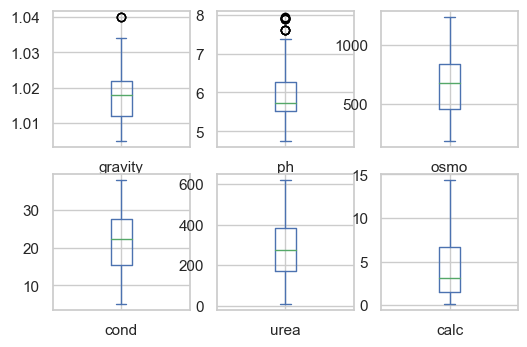

In [309]:
# Boxplot for each feature in X_train dataset without the first and last column
import matplotlib.pyplot as plt

# New dataframe equal to X_train but without the ID column and the target column
X_train_no_target_ID = X_train.drop(['id', 'target'], axis=1)

X_train_no_target_ID.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
# Size increase for each plot
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

# 2.2. Outliers

### 2.1.1 Outliers en gravedad específica

In [310]:
# Selection of outliers observations in Gravity column
# Q1 of Gravity column
Q1 = X_train_no_target_ID['gravity'].quantile(0.25)
# Q3 of Gravity column
Q3 = X_train_no_target_ID['gravity'].quantile(0.75)
# IQR of Gravity column
IQR = Q3 - Q1
# Lower limit of Gravity column
lower_limit = Q1 - 1.5 * IQR
# Upper limit of Gravity column
upper_limit = Q3 + 1.5 * IQR

# Print of all Boxplot inforamtion of Gravity column
print('Lower limit of Gravity column: ', lower_limit)
print('Upper limit of Gravity column: ', upper_limit)
print('Q1 of Gravity column: ', Q1)
print('Q3 of Gravity column: ', Q3)

# Observations over the upper limit
X_train_observations_over_UL = X_train_no_target_ID[X_train_no_target_ID['gravity'] > upper_limit]
X_train_observations_over_UL.head()

Lower limit of Gravity column:  0.997
Upper limit of Gravity column:  1.037
Q1 of Gravity column:  1.012
Q3 of Gravity column:  1.022


,gravity,ph,osmo,cond,urea,calc
200,1.04,6.28,838,14.3,486,8.53
315,1.04,5.73,704,24.5,260,3.34
404,1.04,5.74,1236,27.0,620,3.98


Teenemos varias observaciones con una gravedad específica alta, superior a 1.003, que puede indicar una concentración elevada de sustancias disueltas, lo cual puede aumentar el riesgo de formación de cálculos renales.

Los cálculos renales, especialmente los de oxalato de calcio y fosfato de calcio, tienden a formarse en orina concentrada. Esto se debe a que cuando las sustancias como el calcio, el oxalato y el fosfato están presentes en altas concentraciones, tienen más probabilidades de agruparse y formar cristales, los precursores de los cálculos.

Además, una orina concentrada puede indicar un estado de deshidratación. La deshidratación puede aumentar el riesgo de cálculos renales al disminuir el volumen de orina, lo que hace que las sustancias que forman cálculos estén más concentradas en la orina y, por lo tanto, tengan más probabilidades de formar cristales.

Por lo tanto, si un individuo tiene consistentemente una gravedad específica de orina alta, podría ser útil para esa persona aumentar la ingesta de líquidos para diluir la orina, lo que puede ayudar a reducir el riesgo de formación de cálculos renales.

### 2.1.1. Outliers en pH

El pH de la orina puede variar dependiendo de muchos factores, incluyendo la dieta, ciertos medicamentos, y condiciones médicas. Sin embargo, generalmente, el rango de pH normal de la orina se considera entre 4.6 y 8.0. La mayoría de las veces, la orina tiende a ser ligeramente ácida, con un valor medio de pH de alrededor de 6.0.

Un pH más bajo (ácido) puede ser causado por, entre otras cosas, una dieta alta en proteínas animales, la deshidratación, ciertos medicamentos y ciertas afecciones médicas, como el síndrome de malabsorción o la diabetes.

Por otro lado, un pH más alto (básico) puede ser causado por una dieta alta en frutas y verduras, infecciones del tracto urinario, o ciertas afecciones metabólicas.

El pH de la orina puede influir en la tendencia a formar ciertos tipos de cálculos renales. Por ejemplo, un pH urinario alto puede favorecer la formación de cálculos de fosfato de calcio o estruvita, mientras que un pH urinario bajo puede favorecer la formación de cálculos de ácido úrico o cistina.

- Cálculos de oxalato de calcio: Estos son el tipo más común de cálculos renales y pueden formarse en orina con un rango amplio de pH. Un pH urinario persistentemente por debajo de 5.5 podría contribuir a su formación, ya que en condiciones más ácidas, el calcio y el oxalato tienen una mayor tendencia a combinarse y formar cristales, los precursores de los cálculos. Sin embargo, los cálculos de oxalato de calcio también pueden formarse en orina con un pH más neutral.

- Cálculos de fosfato de calcio: Estos cálculos pueden formarse en orina con un pH más alcalino. Si el pH de la orina es regularmente superior a 7,0, podría existir un mayor riesgo de desarrollar este tipo de cálculos.

- Cálculos de ácido úrico: Este tipo de cálculos se forman más fácilmente en orina ácida. Si el pH de la orina es regularmente inferior a 5.5, podría existir un mayor riesgo de desarrollar este tipo de cálculos.

- Cálculos de estruvita (o fosfato de magnesio amónico): Estos cálculos se forman en orina alcalina, a menudo en presencia de infecciones del tracto urinario por bacterias que producen ureasa. Si el pH de la orina es regularmente superior a 7,0, podría existir un mayor riesgo de desarrollar este tipo de cálculos.

Por lo tanto, si un paciente tiene un pH urinario que está constantemente en los extremos (es decir, regularmente por debajo de 5,5 o por encima de 7,0), podría ser útil realizar un seguimiento más detenido para evaluar la posibilidad de formación de cálculos renales. Sin embargo, es importante tener en cuenta que el pH de la orina es solo uno de los muchos factores que contribuyen a la formación de cálculos renales.

In [311]:
# Selection of outliers observations in pH  column
# Q1 of Gravity column
Q1 = X_train_no_target_ID['ph'].quantile(0.25)
# Q3 of Gravity column
Q3 = X_train_no_target_ID['ph'].quantile(0.75)
# IQR of Gravity column
IQR = Q3 - Q1
# Lower limit of Gravity column
lower_limit = Q1 - 1.5 * IQR
# Upper limit of Gravity column
upper_limit = Q3 + 1.5 * IQR

# Print of all Boxplot inforamtion of Gravity column
print('Lower limit of ph column: ', lower_limit)
print('Upper limit of ph column: ', upper_limit)
print('Q1 of ph column: ', Q1)
print('Q3 of ph column: ', Q3)

# Observations over the upper limit
X_train_observations_over_UL_pH = X_train[X_train['ph'] > upper_limit]
X_train_observations_over_UL_pH.head()

Lower limit of ph column:  4.405
Upper limit of ph column:  7.405
Q1 of ph column:  5.53
Q3 of ph column:  6.28


,id,gravity,ph,osmo,cond,urea,calc,target
32,32,1.017,7.61,527,21.4,75,2.17,0
58,58,1.022,7.92,907,26.1,443,4.49,0
104,104,1.017,7.61,527,25.8,75,3.98,0
177,177,1.020,7.90,668,23.6,252,3.98,1
201,201,1.018,7.61,527,20.8,75,3.98,1


Estos valores atípicos son candidatos a generara cálculos renales si se mantiene regularmente en estos valores.

## 2.2. Missing values

In [312]:
# Tabla con informacion de las columnas como: Missing values, tipo de dato, etc.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


No tenemos valores faltantes en ninguna observación.

# 3. Análisis exploratorio de datos (EDA)
Exploraremos los datos para entender mejor las relaciones entre las características y la presencia de cálculos renales.
Como vimos anteriormente, existe posibilidad de cálculos renales en estas condiciones:

- Gravedad específica > 1.03
- pH > 7 y pH< 5.5

Con respecto al resto de variables:

- Osmolaridad: se refiere a la concentración de las partículas solubles, como los electrolitos y otros compuestos, que se encuentran en la orina. Se mide en miliosmoles por litro (mOsm/L).

    El rango normal de osmolaridad en la orina puede variar considerablemente dependiendo de varios factores, como el estado de hidratación, la dieta y ciertas condiciones médicas. Una osmolaridad urinaria constantemente en el extremo superior de este rango (por ejemplo, cercana a 1200 mOsm/L o más) puede indicar un estado de deshidratación o una orina muy concentrada. Esto podría ser motivo de preocupación ya que la orina concentrada puede contribuir a la formación de cálculos renales. En una orina más concentrada, los solutos como el calcio, el oxalato y el fosfato tienen una mayor tendencia a cristalizar y formar cálculos.

- Conductividad: en millimhos (mMho), se refiere a la capacidad de la orina para conducir electricidad. Esta conductividad está relacionada con la cantidad de iones disueltos presentes en la orina.

    Los valores normales de conductividad en la orina pueden variar ampliamente dependiendo de la ingesta de líquidos, la dieta y otros factores. En general, estos valores pueden oscilar entre aproximadamente 1 y 100 mMho/cm. Sin embargo, estos valores pueden ser aún más amplios dependiendo de la metodología y las condiciones de la medición.

    Una conductividad urinaria alta (en el extremo superior de este rango o más allá) puede indicar una orina más concentrada. En orina más concentrada, los solutos como el calcio y el oxalato tienen más probabilidades de cristalizar y formar cálculos.

- Urea: La concentración de urea en la orina puede variar ampliamente y depende de muchos factores, incluyendo la ingesta de proteínas, el estado de hidratación, y la función renal. En general, la concentración de urea en la orina puede oscilar entre aproximadamente 100 y 600 milimoles por litro (mmol/L).

    Una concentración elevada de urea en la orina puede ser indicativa de una ingesta alta de proteínas, de deshidratación o de un aumento en la descomposición de las proteínas en el cuerpo. En el contexto de los cálculos renales, aunque la urea en sí misma no es un factor de riesgo directo para la formación de cálculos, la deshidratación (una posible causa de una concentración elevada de urea en la orina) puede aumentar el riesgo de formación de cálculos al aumentar la concentración de otros solutos en la orina.

    Por lo tanto, una concentración de urea en la orina que esté constantemente en el extremo superior del rango normal (por ejemplo, cercana a 600 mmol/L o más) podría ser motivo de preocupación, especialmente si se asocia con otros factores de riesgo para los cálculos renales.

- Calcio: La concentración de calcio en la orina puede variar dependiendo de varios factores, incluyendo la dieta, la hidratación, y ciertos trastornos metabólicos o renales. Sin embargo, en general, la concentración normal de calcio en la orina es de menos de 7.5 milimoles por día (o alrededor de 0.1 a 0.3 milimoles por litro para un adulto con una producción urinaria normal).

    Una concentración elevada de calcio en la orina, también conocida como hipercalciuria, puede ser un factor de riesgo importante para la formación de cálculos de oxalato de calcio, que es el tipo más común de cálculo renal. Esto se debe a que el exceso de calcio en la orina puede combinarse con el oxalato, formando cristales que pueden agruparse y formar cálculos.

    Por lo tanto, una concentración de calcio en la orina que está constantemente en el extremo superior del rango normal (por ejemplo, cercana a 0.3 milimoles por litro o más) podría ser un motivo de preocupación y posiblemente requeriría un seguimiento más estrecho, especialmente si se asocia con otros factores de riesgo para los cálculos renales.

Resumiento la información anterior con la que ya teníamos, hay posibilidad de cálculos renbales cuando:

- Gravedad específica > 1.03
- pH > 7 y pH< 5.5
- Osmolaridad > 1200 mOsm/L
- Conductividad > 100 mMho/cm
- Urea > 600 mmol/L
- Calcio > 0.3 mmol/L


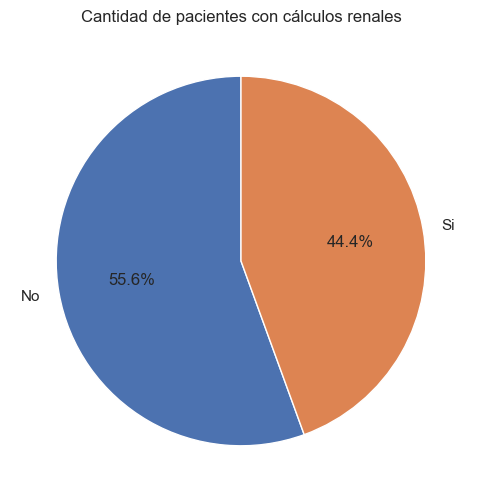

In [313]:
# Cantidad de pacientes con cálculos renales ,representados en un donut chart
import matplotlib.pyplot as plt

# Cantidad de pacientes con cálculos renales
X_train['target'].value_counts()

# Plot, con tamaño de 6x6
plt.rcParams['figure.figsize'] = [6, 6]
# Plot de donut chart
plt.pie(X_train['target'].value_counts(), labels=['No', 'Si'], autopct='%1.1f%%', startangle=90)
plt.title('Cantidad de pacientes con cálculos renales')
plt.show()


Prácticamente la mitad de las observacione tienen cálculos renales.

## 3.1. Correlación entre variables

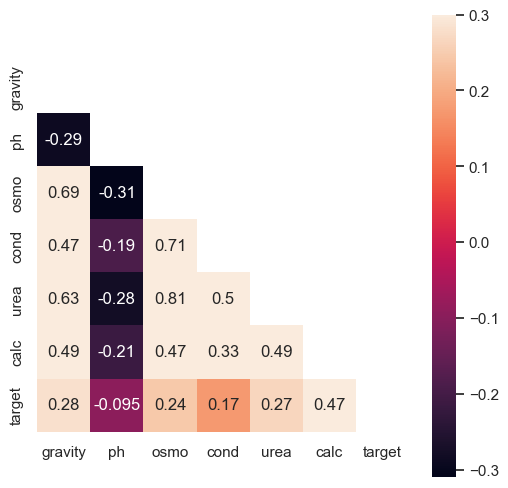

In [314]:
# Matriz de correlacion de X_train
import seaborn as sns
import numpy as np

# New dataframe equal to X_train but without the ID column
X_train_no_ID = X_train.drop(['id'], axis=1)

# Correlation matrix without superior diagonal
corr_matrix = X_train_no_ID.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(6, 6))
    ax = sns.heatmap(corr_matrix, mask=mask, vmax=.3, square=True, annot=True)

# Heatmap
plt.show()


Existe cierta correlación entre variables que descarta que alguna de ellas pueda ser eliminada en procesos posteriores.

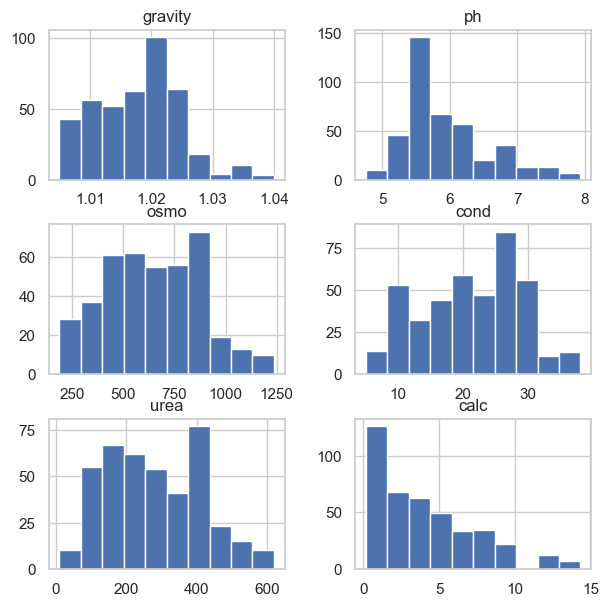

In [315]:
# Histograma de cada variable
X_train_no_target_ID.hist(bins=10, figsize=(7,7))
plt.show()


Excepto en calcio y conductividad, encontramos observacioens candidatas a presentar cálulos renaes.

Análisis de grupos

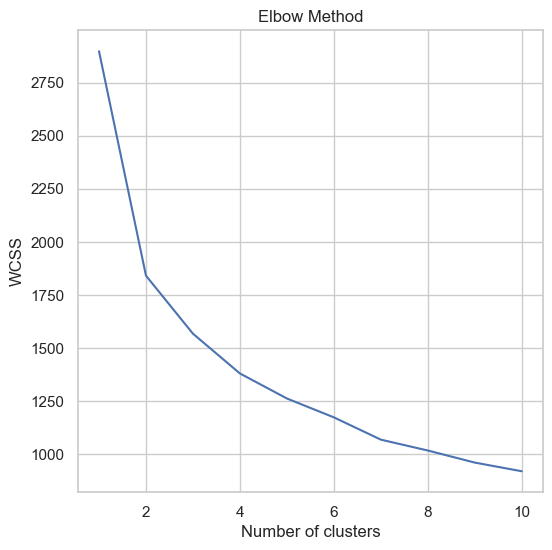

In [316]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X_train_no_ID)

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()



Podríamos decir que el codo estarían en 2-3.

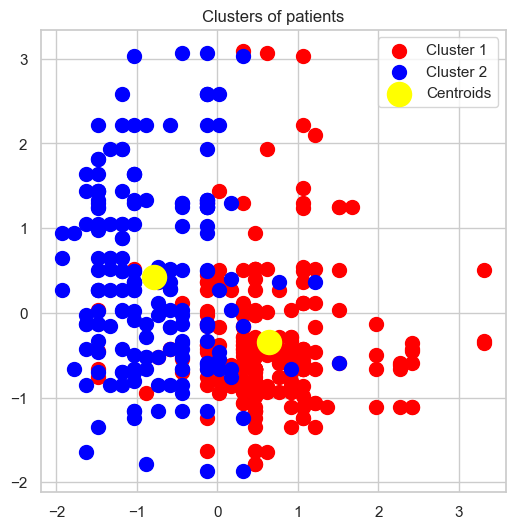

In [317]:
# Aplicar el algoritmo de k-means con 2 clusters
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(scaled_df)

# Visualizar los resultados
plt.scatter(scaled_df[clusters == 0, 0], scaled_df[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_df[clusters == 1, 0], scaled_df[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of patients')
plt.legend()
plt.show()

Podemos observar 2 grupos bien difrenciados con outliers dentro de cada uno de ellos que podrían ser problemáticos. Aún así teniendo en cuenta que son dos grupòs bastantes parecidos y que finalmente alrededor de 55% de las observaciones no tienen cálculos frente al 45% que sí, podría ser una opción a explorar posteriormente realizar una redución de compoenentes PCA. Se decide realizar la reducción para futuros análisis.

In [318]:
from sklearn.decomposition import PCA

# Supongamos que `df` es tu DataFrame y quieres reducirlo a 2 componentes principales
pca = PCA(n_components=2)

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
df = scaler.fit_transform(X_train_no_ID)

principalComponents = pca.fit_transform(df)

# Convertir las componentes principales a un DataFrame para facilitar el manejo
X_train_PCA = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])


In [319]:
X_train_PCA.head()

,principal component 1,principal component 2
0,-2.185045,-0.334553
1,1.038516,-1.160954
2,-1.099432,0.396896
3,1.051454,0.968296
4,1.019882,0.251909


# Ingeniería de características
Vamos a realizar dos tipos de ingeniería de características. Por un lado se procederá a crear uan columna binaria adicional por cada variable que indique si existe riesgo o no de que presente calculos renales por encontrarse en los rangos anteriormente mencionados. Después generaremos nuevas características a partir de relaciones entre las existentes, relaciones que tras la investigación previa son susceptibles de ser importantes. 

## Variables binarias de riesgo

- Gravedad específica > 1.03
- pH > 7 y pH< 5.5
- Osmolaridad > 1200 mOsm/L
- Conductividad > 100 mMho/cm
- Urea > 600 mmol/L
- Calcio > 0.3 mmol/L

In [320]:
# Genramos un nuevo dataframe vacío llamado X_train_IC_Variables_Riesgo
X_train_IC_Variables_Riesgo = pd.DataFrame()

### Gravedad específica

In [321]:
# Creamos una nueva columna que se llame 'Riesgo Gravedad' y que en caso de que la gravedad sea mayor a 1.03, se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo Gravedad'] = np.where(X_train['gravity'] > 1.03, 1, 0)

### pH

In [322]:
# Creamos una nueva columna que se llame 'Riesgo pH' y que en caso de que el pH sea mayor que 7 o menor que 5.5 se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo pH'] = np.where(((X_train['ph'] > 7) | (X_train['ph'] < 5.5)), 1, 0)

### Osmolaridad

In [323]:
# Creamos una nueva columna que se llame 'Riesgo Osmolaridad' y que en caso de que a osmolaridad sea mayor que 1200 se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo Osmolaridad'] = np.where((X_train['osmo'] > 1200), 1, 0)

### Conductividad

In [324]:
X_train.describe()

,id,gravity,ph,osmo,cond,urea,calc,target
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,206.500000,1.017894,5.955459,651.545894,21.437923,278.657005,4.114638,0.444444
std,119.655756,0.006675,0.642260,234.676567,7.514750,136.442249,3.217641,0.497505
min,0.000000,1.005000,4.760000,187.000000,5.100000,10.000000,0.170000,0.000000
25%,103.250000,1.012000,5.530000,455.250000,15.500000,170.000000,1.450000,0.000000
50%,206.500000,1.018000,5.740000,679.500000,22.200000,277.000000,3.130000,0.000000
75%,309.750000,1.022000,6.280000,840.000000,27.600000,385.000000,6.630000,1.000000
max,413.000000,1.040000,7.940000,1236.000000,38.000000,620.000000,14.340000,1.000000


In [325]:
# Creamos una nueva columna que se llame 'Riesgo conductividad' y que en caso de que sea mayor a 100 se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo conductividad'] = np.where((X_train['cond'] > 100), 1, 0)

### Urea

In [326]:
# Creamos una nueva columna que se llame 'Riesgo urea' y que en caso de que sea mayor a 600 se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo urea'] = np.where((X_train['urea'] > 600), 1, 0)

### Calcio

In [327]:
# Creamos una nueva columna que se llame 'Riesgo calcio' y que en caso de que sea mayor a 0.3 se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo calcio'] = np.where((X_train['calc'] > 0.3), 1, 0)

In [328]:
X_train_IC_Variables_Riesgo.head()

,Riesgo Gravedad,Riesgo pH,Riesgo Osmolaridad,Riesgo conductividad,Riesgo urea,Riesgo calcio
0,0,0,0,0,0,1
1,0,1,0,0,0,1
2,0,0,0,0,0,1
3,0,1,0,0,0,1
4,0,0,0,0,0,1


In [329]:
X_train_IC_Variables_Riesgo.sum()

Riesgo Gravedad          17
Riesgo pH               115
Riesgo Osmolaridad       10
Riesgo conductividad      0
Riesgo urea              10
Riesgo calcio           407
dtype: int64

In [330]:
X_train_IC_Variables_Riesgo.drop(['Riesgo conductividad'], axis=1).sum()

Riesgo Gravedad        17
Riesgo pH             115
Riesgo Osmolaridad     10
Riesgo urea            10
Riesgo calcio         407
dtype: int64

## Relaciones entre características

Relaciones interesantes relacionadas con cálculos renales:

- Relación calcio-urea: La formación de cálculos de oxalato de calcio puede estar influida por la concentración de calcio y urea. Podríamos crear una nueva característica que sea la relación entre estas dos variables. Por ejemplo: Relación CALC/Urea = Concentración de calcio / Concentración de urea.

- Osmolaridad ajustada por gravedad específica: La osmolaridad es proporcional a la concentración de moléculas en solución, y la gravedad específica es una medida de la densidad de la orina. Podría ser útil crear una característica que represente la osmolaridad ajustada por la gravedad específica. Por ejemplo: Osmolaridad ajustada = Osmolaridad / Gravedad específica.

- Índice de saturación de calcio: En la urología, el índice de saturación de calcio es una medida que puede ayudar a predecir la formación de cálculos de oxalato de calcio. Podemos crear una característica similar usando nuestras variables: Índice de saturación de calcio = Concentración de calcio * Osmolaridad.

- Factor de concentración iónica: La conductividad es proporcional a la concentración de iones cargados en solución, y el pH también puede afectar la concentración iónica. Podríamos crear una nueva característica que sea el producto de la conductividad y el pH. Por ejemplo: Factor de concentración iónica = Conductividad * pH.

In [331]:
# Creamos un nuevo dataframe llamado X_train_IC_Relaciones
X_train_IC_Relaciones = pd.DataFrame()

### Relación Calcio - Urea

In [332]:
X_train_IC_Relaciones['Realcion Calc-Urea'] = X_train['calc'] / X_train['urea']

### Osmolaridad ajustada por gravedad específica

In [333]:
X_train_IC_Relaciones['Osmolaridad ajustada'] = X_train['osmo']/X_train['gravity']

### Índice de saturación de calcio

In [334]:
X_train_IC_Relaciones['Indice saturacion calc'] = X_train['calc']*X_train['osmo']

### Factor de concentración iónica.

In [335]:
X_train_IC_Relaciones['Factor concentracion ionica'] = X_train['cond']*X_train['ph']

In [336]:
X_train_IC_Relaciones.describe()

,Realcion Calc-Urea,Osmolaridad ajustada,Indice saturacion calc,Factor concentracion ionica
count,414.000000,414.000000,414.000000,414.000000
mean,0.015876,639.076188,3036.509783,126.756971
std,0.012198,227.658735,3016.695495,44.373627
min,0.000603,184.965381,42.670000,27.591000
25%,0.007832,447.717555,793.747500,92.002500
50%,0.013333,668.633235,1946.680000,131.286000
75%,0.019943,819.113212,4270.970000,158.472000
max,0.108750,1211.764706,17724.240000,238.640000


In [337]:
# Unimos ambos dataframe en uno solo con todas las variables de ingenieria de caracteristicas
X_train_IC = pd.concat([X_train_IC_Relaciones, X_train_IC_Variables_Riesgo], axis=1)

# Modelado
Entrenaremos varios modelos de aprendizaje automático y seleccionaremos el que ofrezca el mejor rendimiento. Teniendo en cuenta las características de nuestro conjunto de datos, hay algunos modelos que pueden no funcionar tan bien. Por ejemplo:

- Naive Bayes: Este modelo asume que todas las variables de entrada son independientes entre sí, lo que se denomina "naive" (ingenuo). Al tener características dependientes entre sí podemos descartar este modelo.

- Regresión Logística: Aunque la regresión logística no requiere que las características sean independientes, la multicolinealidad (alta correlación entre características predictoras) puede hacer que el modelo sea inestable, lhaciendo que los coeficientes pueden cambiar drásticamente con pequeñas modificaciones en el modelo.

Los siguientes modelos, sin embargo, pueden manejar relaciones dependientes entre las características:

- Árboles de decisión y Random Forest: Estos modelos pueden manejar bien las interacciones entre las variables, por lo que pueden ser útiles en este caso.

- Gradient Boosting (XGBoost, LightGBM): Al igual que los árboles de decisión, estos modelos también pueden capturar interacciones entre características.

- Máquinas de vectores de soporte (SVM): Las SVM pueden manejar interacciones entre características, especialmente cuando se utiliza un kernel no lineal.

- Redes Neuronales: Las redes neuronales son capaces de capturar interacciones complejas entre características, por lo que podrían ser una buena opción.

- K-Nearest Neighbors (KNN): Este modelo no hace ninguna suposición sobre la independencia de las características, por lo que puede ser útil en este caso.

Se prueba cada uno de ellos.

In [338]:
X_train.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [339]:
X_train.drop(['id', 'target'], axis=1, inplace=True)

In [340]:
X_train.head()

,gravity,ph,osmo,cond,urea,calc
0,1.013,6.19,443,14.8,124,1.45
1,1.025,5.40,703,23.6,394,4.18
2,1.009,6.13,371,24.5,159,9.04
3,1.021,4.91,442,20.8,398,6.63
4,1.021,5.53,874,17.8,385,2.21


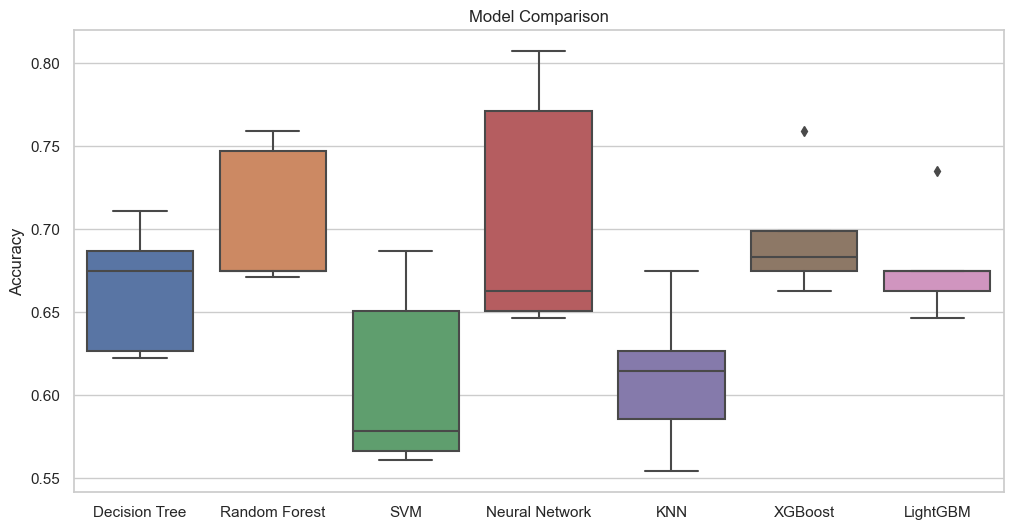

In [341]:
# Importamos las librerías necesarias
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


# Creamos una lista con los modelos a entrenar
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(probability=True),
    MLPClassifier(max_iter=1000),
    KNeighborsClassifier(),
    XGBClassifier(eval_metric='logloss'),  
    LGBMClassifier() 
]

# Creamos una lista para guardar los resultados de la validación cruzada
cv_results = []

# Realizamos la validación cruzada para cada modelo
for model in models:
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  
    cv_results.append(cv_scores)
    
# Creamos un dataframe para visualizar los resultados
cv_df = pd.DataFrame(cv_results, 
                     index=['Decision Tree', 'Random Forest', 'SVM', 'Neural Network', 'KNN', 'XGBoost', 'LightGBM']).T

# Creamos el boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=cv_df)
plt.title('Model Comparison')
plt.ylabel('Accuracy')  
plt.show()


Seleccionamos inicialmente el modelo random forest, y tras evaluar sus resultados decidiremos si entrenar nuevos modelos o no.

# Evaluación del modelo


## Selección de mejores hiperparametros

In [297]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Eespacio de búsqueda para los hiperparámetros
space = {
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
    'max_depth': hp.quniform('max_depth', 1, 20, 1),
    'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
    'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
    'criterion': hp.choice('criterion', ['gini', 'entropy'])
}

# Función objetivo para la optimización
def objective(space):
    model = RandomForestClassifier(
        n_estimators = int(space['n_estimators']),
        max_depth = int(space['max_depth']),
        min_samples_leaf = space['min_samples_leaf'],
        min_samples_split = space['min_samples_split'],
        criterion = space['criterion']
    )
    
    accuracy = cross_val_score(model, X_train, y_train, cv=5).mean()

    # Queremos maximizar la precisión, por lo que devolvemos su negativo
    return {'loss': -accuracy, 'status': STATUS_OK}

# Ejecuta la optimización
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            trials=trials)

print("Best: ", best)

100%|██████████| 100/100 [08:08<00:00,  4.89s/trial, best loss: -0.7269761974728182]
Best:  {'criterion': 1, 'max_depth': 6.0, 'min_samples_leaf': 0.0266750068456163, 'min_samples_split': 0.10569712997517333, 'n_estimators': 218.0}


# Entrenamiento del modelo con los mejores hiperparametros

In [342]:
#max_features_options = ['sqrt']
criterion_options = ['gini', 'entropy']

# Se recuperan los mejores hiperparámetros
best_params = {
    'n_estimators': int(best['n_estimators']),
    'max_depth': int(best['max_depth']),
    #'max_features': max_features_options[int(best['max_features'])],
    'min_samples_leaf': best['min_samples_leaf'],
    'min_samples_split': best['min_samples_split'],
    'criterion': criterion_options[int(best['criterion'])]
}

# Se entrena el modelo con los mejores hiperparámetros
model = RandomForestClassifier(**best_params)
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6,
                       min_samples_leaf=0.0266750068456163,
                       min_samples_split=0.10569712997517333, n_estimators=218)

In [345]:
# Uniendo las características originales y las de ingeniería
X_train_completo = pd.concat([X_train, X_train_IC], axis=1)

# Creando un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['feature', 'score'])



# Bucle a través de todas las características
for feature in X_train_IC.columns:

    # Añadimos a X el dataframe X_train mas la característica feature al final del dataframe
    X = pd.concat([X_train, X_train_IC[feature]], axis=1)    

    #     # Calcular la puntuación de validación cruzada para la característica actual
    scores = cross_val_score(model, X, y_train, cv=5)
    
    # Añadir los resultados al DataFrame
    for score in scores:
        results.loc[len(results)] = [feature, score]

plt.figure(figsize=(12, 6))
sns.boxplot(x='feature', y='score', data=results)
plt.axhline(y=0.725, color='r', linestyle='-')
plt.xticks(rotation=90)  # Gira las etiquetas del eje x para que sean más legibles
plt.title('Feature Engineering')
plt.ylabel('Accuracy')
plt.show()



Text(0, 0.5, 'Accuracy')

In [ ]:
# Creamos una nueva columna que se llame 'Riesgo conductividad' y que en caso de que sea mayor a 100 se le asigne un 1, en caso contrario, un 0
X_train_IC_Variables_Riesgo['Riesgo conductividad'] = np.where((X_train['cond'] > 100), 1, 0)

In [ ]:
output = pd.DataFrame({'id': X_train['id'],
                       'target': y_pred})
output.to_csv('submission.csv', index=False) 

# Ajuste del modelo
Optimización del modelo para mejorar su rendimiento.
